<a href="https://colab.research.google.com/github/Mayuri2201/Predictive-Analytics-for-Business-Metrics/blob/main/Predictive_Analytics_for_Business_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample dataset created:
        Month  Sales  Marketing_Spend  Store_Visits
0  2020-01-31  43654             3433          1957
1  2020-02-29  35795             2215          1562
2  2020-03-31  20860             1955          1875
3  2020-04-30  25390             3324          1566
4  2020-05-31  49802             2184          1243
5  2020-06-30  41575             1459          1831
6  2020-07-31  31964             4385          1504
7  2020-08-31  31284             1021          1130
8  2020-09-30  42118             3300          1484
9  2020-10-31  26265             1747          1818
10 2020-11-30  36850             3904          1646
11 2020-12-31  49910             4632          1020
12 2021-01-31  24426             1474          1840
13 2021-02-28  41962             2082          1166
14 2021-03-31  34423             3558          1273
15 2021-04-30  48020             4753          1387
16 2021-05-31  31363             3047          1600
17 2021-06-30  47495             4547   

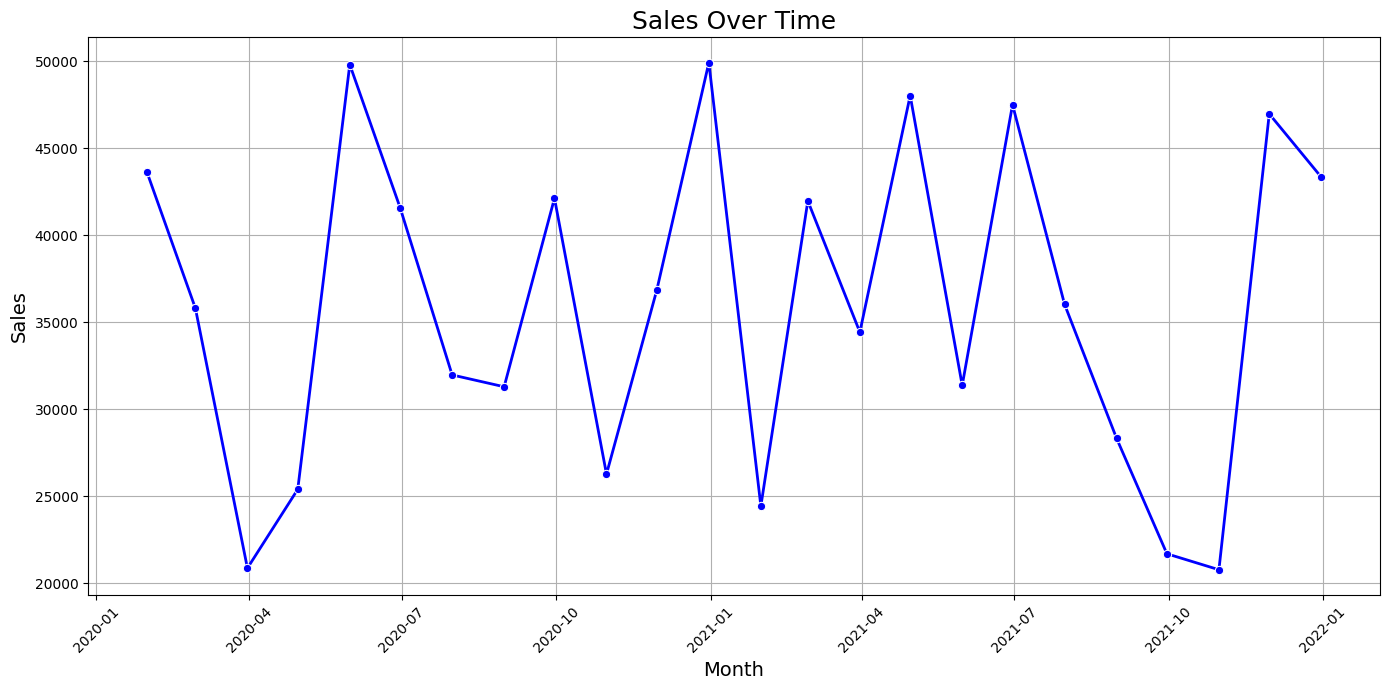

Best Hyperparameters: {'model__max_depth': None, 'model__n_estimators': 100}
Mean Squared Error: 62750383.93
Mean Absolute Error: 6814.00
R² Score: -0.53


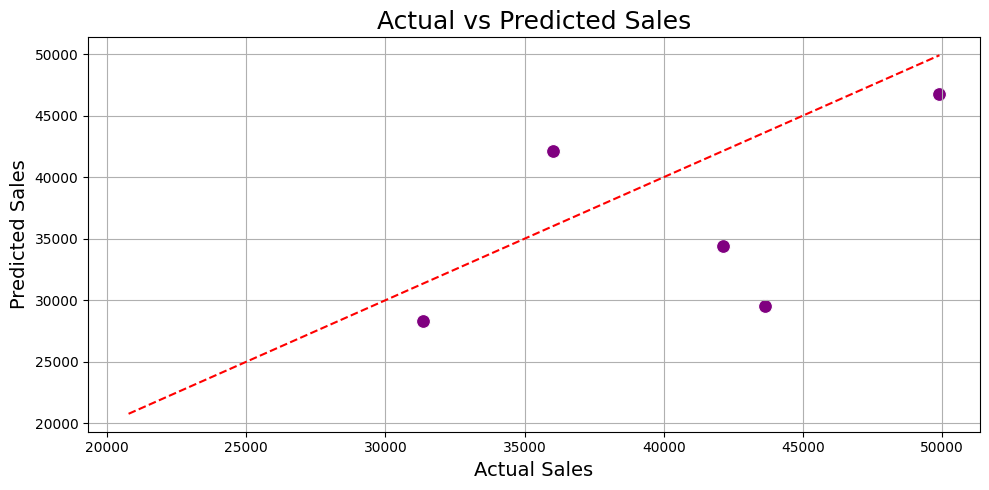

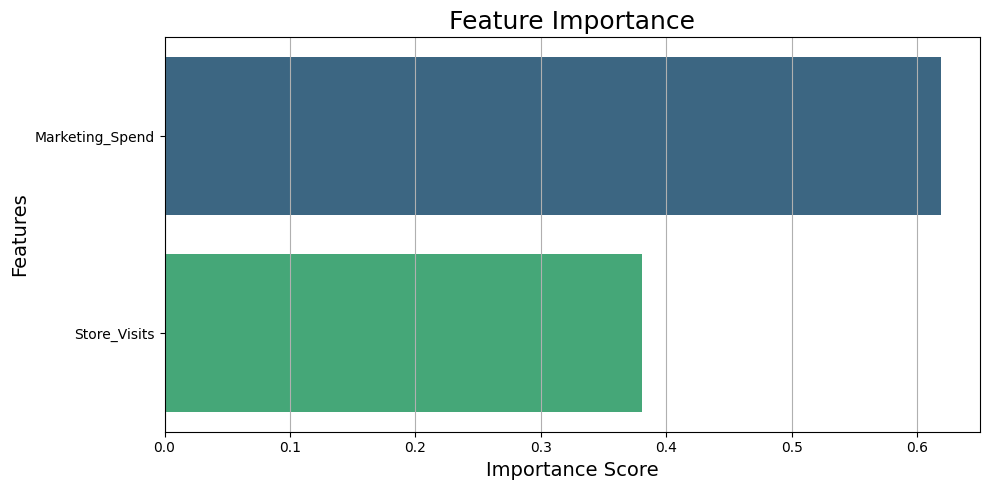


Conclusion:
The Random Forest model outperforms linear regression by capturing complex relationships.
This predictive model can be utilized to forecast future sales based on marketing spend and store visits.


In [7]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

# Step 2: Create a Sample Dataset
np.random.seed(42)  # For reproducibility
data = {
    'Month': pd.date_range(start='2020-01-01', periods=24, freq='M'),
    'Sales': np.random.randint(20000, 50000, size=24),
    'Marketing_Spend': np.random.randint(1000, 5000, size=24),
    'Store_Visits': np.random.randint(1000, 2000, size=24)
}
df = pd.DataFrame(data)

# Save the sample dataset to a CSV file
df.to_csv('business_metrics.csv', index=False)
print("Sample dataset created:")
print(df)

# Step 3: Load the Dataset
# If you have a CSV file, you can upload it manually using the following line.
# uploaded = files.upload()  # Uncomment this line to upload your CSV file
# df = pd.read_csv('business_metrics.csv')  # Uncomment this line if using an uploaded file

# Step 4: Data Exploration
print("\nData Overview:")
print(df.describe())

# Visualizing Sales over Time with enhanced aesthetics
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Month', y='Sales', marker='o', color='blue', linewidth=2)
plt.title('Sales Over Time', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Data Preprocessing
# Extract features and target variable
X = df[['Marketing_Spend', 'Store_Visits']]
y = df['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scaling Features with a Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))  # Using RandomForest for better performance
])

# Step 7: Hyperparameter Tuning
param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 8: Best Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Step 9: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R² Score: {r2:.2f}')

# Step 10: Visualize Predictions with enhanced aesthetics
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, color='purple', s=100)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect prediction
plt.title('Actual vs Predicted Sales', fontsize=18)
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 11: Feature Importance Visualization
importances = best_model.named_steps['model'].feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=feature_names[indices], palette='viridis')
plt.title('Feature Importance', fontsize=18)
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Step 12: Conclusions
print("\nConclusion:")
print("The Random Forest model outperforms linear regression by capturing complex relationships.")
print("This predictive model can be utilized to forecast future sales based on marketing spend and store visits.")
